# Synthetic Observations

In [1]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create synthetic points
subprocess.run([
    "python", "../../scripts/generatedualtemplatepoints.py",
    "-A", str(1000),
    "-B", str(1000),
    "-o", "synthetic/datatemplate.txt",
    "--xmin", str(1.0), "--xmax", str(7.0),
    "--ymin", str(1.0), "--ymax", str(7.0)
])

CompletedProcess(args=['python', '../../scripts/generatedualtemplatepoints.py', '-A', '1000', '-B', '1000', '-o', 'synthetic/datatemplate.txt', '--xmin', '1.0', '--xmax', '7.0', '--ymin', '1.0', '--ymax', '7.0'], returncode=0)

In [17]:
# Create synthetic observations
subprocess.run([
    "./mksynthetic", 
    "-m", "SyntheticSnow",
    "-m", "SyntheticIce",
    "-i", "synthetic/datatemplate.txt",
    "-x", str(1.0), "-X", str(7.0),
    "-y", str(1.0), "-Y", str(7.0),
    "-o", "synthetic/synthetic_obs.txt",          # Observations with noise
    "-O", "synthetic/synthetic_franke.txt.true",  # Observations without noise
    "-n", str(0.1),                              # Standard deviation of independent Gaussian noise 
    "-I", "synthetic/syntheticobs_franke.img",    # Image of the output
    "-W", str(160), "-H", str(160)
])

Model  0 : SyntheticSnow
Model  1 : SyntheticIce
2000 observations


CompletedProcess(args=['./mksynthetic', '-m', 'SyntheticSnow', '-m', 'SyntheticIce', '-i', 'synthetic/datatemplate.txt', '-x', '1.0', '-X', '7.0', '-y', '1.0', '-Y', '7.0', '-o', 'synthetic/synthetic_obs.txt', '-O', 'synthetic/synthetic_franke.txt.true', '-n', '0.1', '-I', 'synthetic/syntheticobs_franke.img', '-W', '160', '-H', '160'], returncode=0)

In [18]:
obs = pd.read_table("synthetic/synthetic_obs.txt", skiprows=1, names=["Lon", "Lat", "Type", "Value", "Sigma"], delimiter="\s+")

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

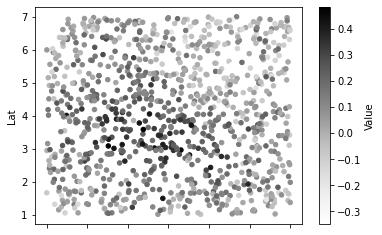

In [19]:
obs[obs['Type']==0].plot(kind="scatter", x='Lon', y='Lat', c="Value")

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

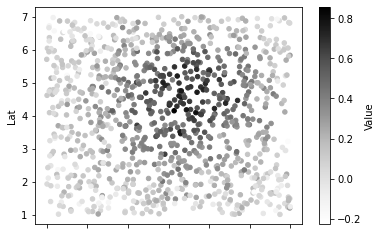

In [20]:
obs[obs['Type']==1].plot(kind="scatter", x='Lon', y='Lat', c="Value")

In [32]:
imgA = np.loadtxt("synthetic/syntheticobs_franke.img.A")
imgB = np.loadtxt("synthetic/syntheticobs_franke.img.B")

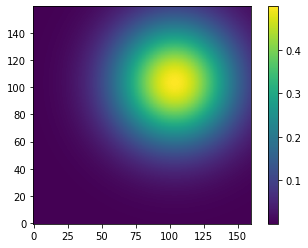

In [33]:
plt.imshow(imgA, origin = 'lower')
plt.colorbar()

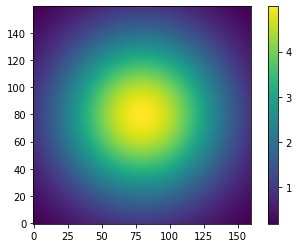

In [34]:
plt.imshow(imgB, origin = 'lower')
plt.colorbar()

## Synthetic tests analysis

In [35]:
# Load true model parameters 
snow_true = np.loadtxt("synthetic/syntheticobs_franke.img.A")
ice_true =  np.loadtxt("synthetic/syntheticobs_franke.img.B")

# Load inverted parameters 
snow_inversion = np.loadtxt("images/snow")
ice_inversion = np.loadtxt("images/ice")

In [36]:
error_snow = snow_true - snow_inversion
error_ice = ice_true - ice_inversion

Text(0.5, 1.0, 'Snow Mean Error')

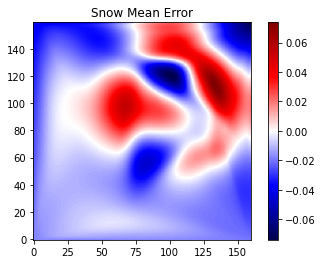

In [37]:
plt.imshow(error_snow, cmap='seismic', origin='lower')
plt.colorbar()
plt.title("Snow Mean Error")

Text(0.5, 1.0, 'Ice Mean Error')

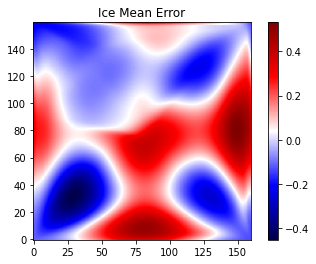

In [38]:
plt.imshow(error_ice, cmap='seismic', origin='lower')
plt.colorbar()
plt.title("Ice Mean Error")

Text(0.5, 1.0, 'Ice MRSE')

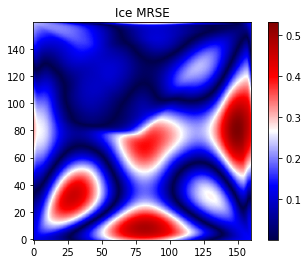

In [42]:
plt.imshow((error_ice**2)**(1/2), cmap='seismic', origin='lower')
plt.colorbar()
plt.title("Ice MRSE")

Text(0.5, 1.0, 'Snow MRSE')

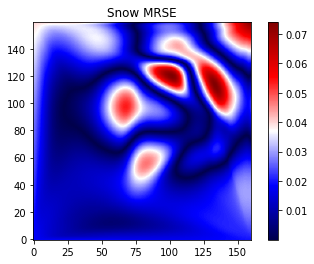

In [40]:
plt.imshow((error_snow**2)**(1/2), cmap='seismic', origin='lower')
plt.colorbar()
plt.title("Snow MRSE")

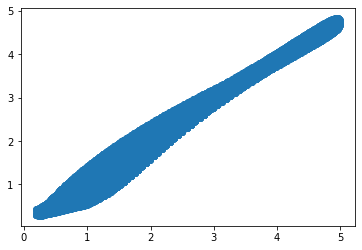

In [41]:
plt.scatter(x=ice_true.flatten(), y=ice_inversion.flatten())

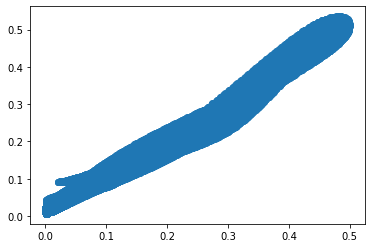

In [31]:
plt.scatter(x=snow_true.flatten(), y=snow_inversion.flatten())